/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.05303786 0.06883104 0.15074535 0.15410421 0.15749415 0.15824346
 0.20034594 0.2683238  0.27540624 0.35446713 0.37197531 0.38033942
 1.31149772 1.31674482 1.31769091 1.32139538 1.42424155 1.48247223
 2.36067944 2.43201453 2.44828755 2.52711437 2.54921459 2.78830122]
[0.15624151 0.15861976 0.16074033 0.19091946 0.19533335 0.19811578
 0.21324229 0.25865259 0.28424427 0.28625337 0.31250253 0.35870375
 1.32459307 1.37611983 1.70695112 1.71875324 1.84048513 1.97622026
 2.21496649 2.37129298 2.56696975 2.62567717 2.68950996 2.73997406]
[0.14243141 0.1687639  0.16974094 0.21950675 0.2386875  0.28526663
 0.28656979 0.29482647 0.29886242 0.30077316 0.31005226 0.31089099
 1.32660205 1.49308818 1.61023836 1.91985586 1.94068678 2.17907665
 2.26945201 2.37712005 2.52892767 2.74113622 2.91310689 3.06053743]
[0.13297996 0.13649646 0.20117705 0.20232756 0.20851004 0.21045566
 0.22085223 0.22295549 0.26408149 0.26445356 0.2686011  0.26878582
 1.39321648 1.44292253 1.5916084  1.6081537  1.61348997 1.6

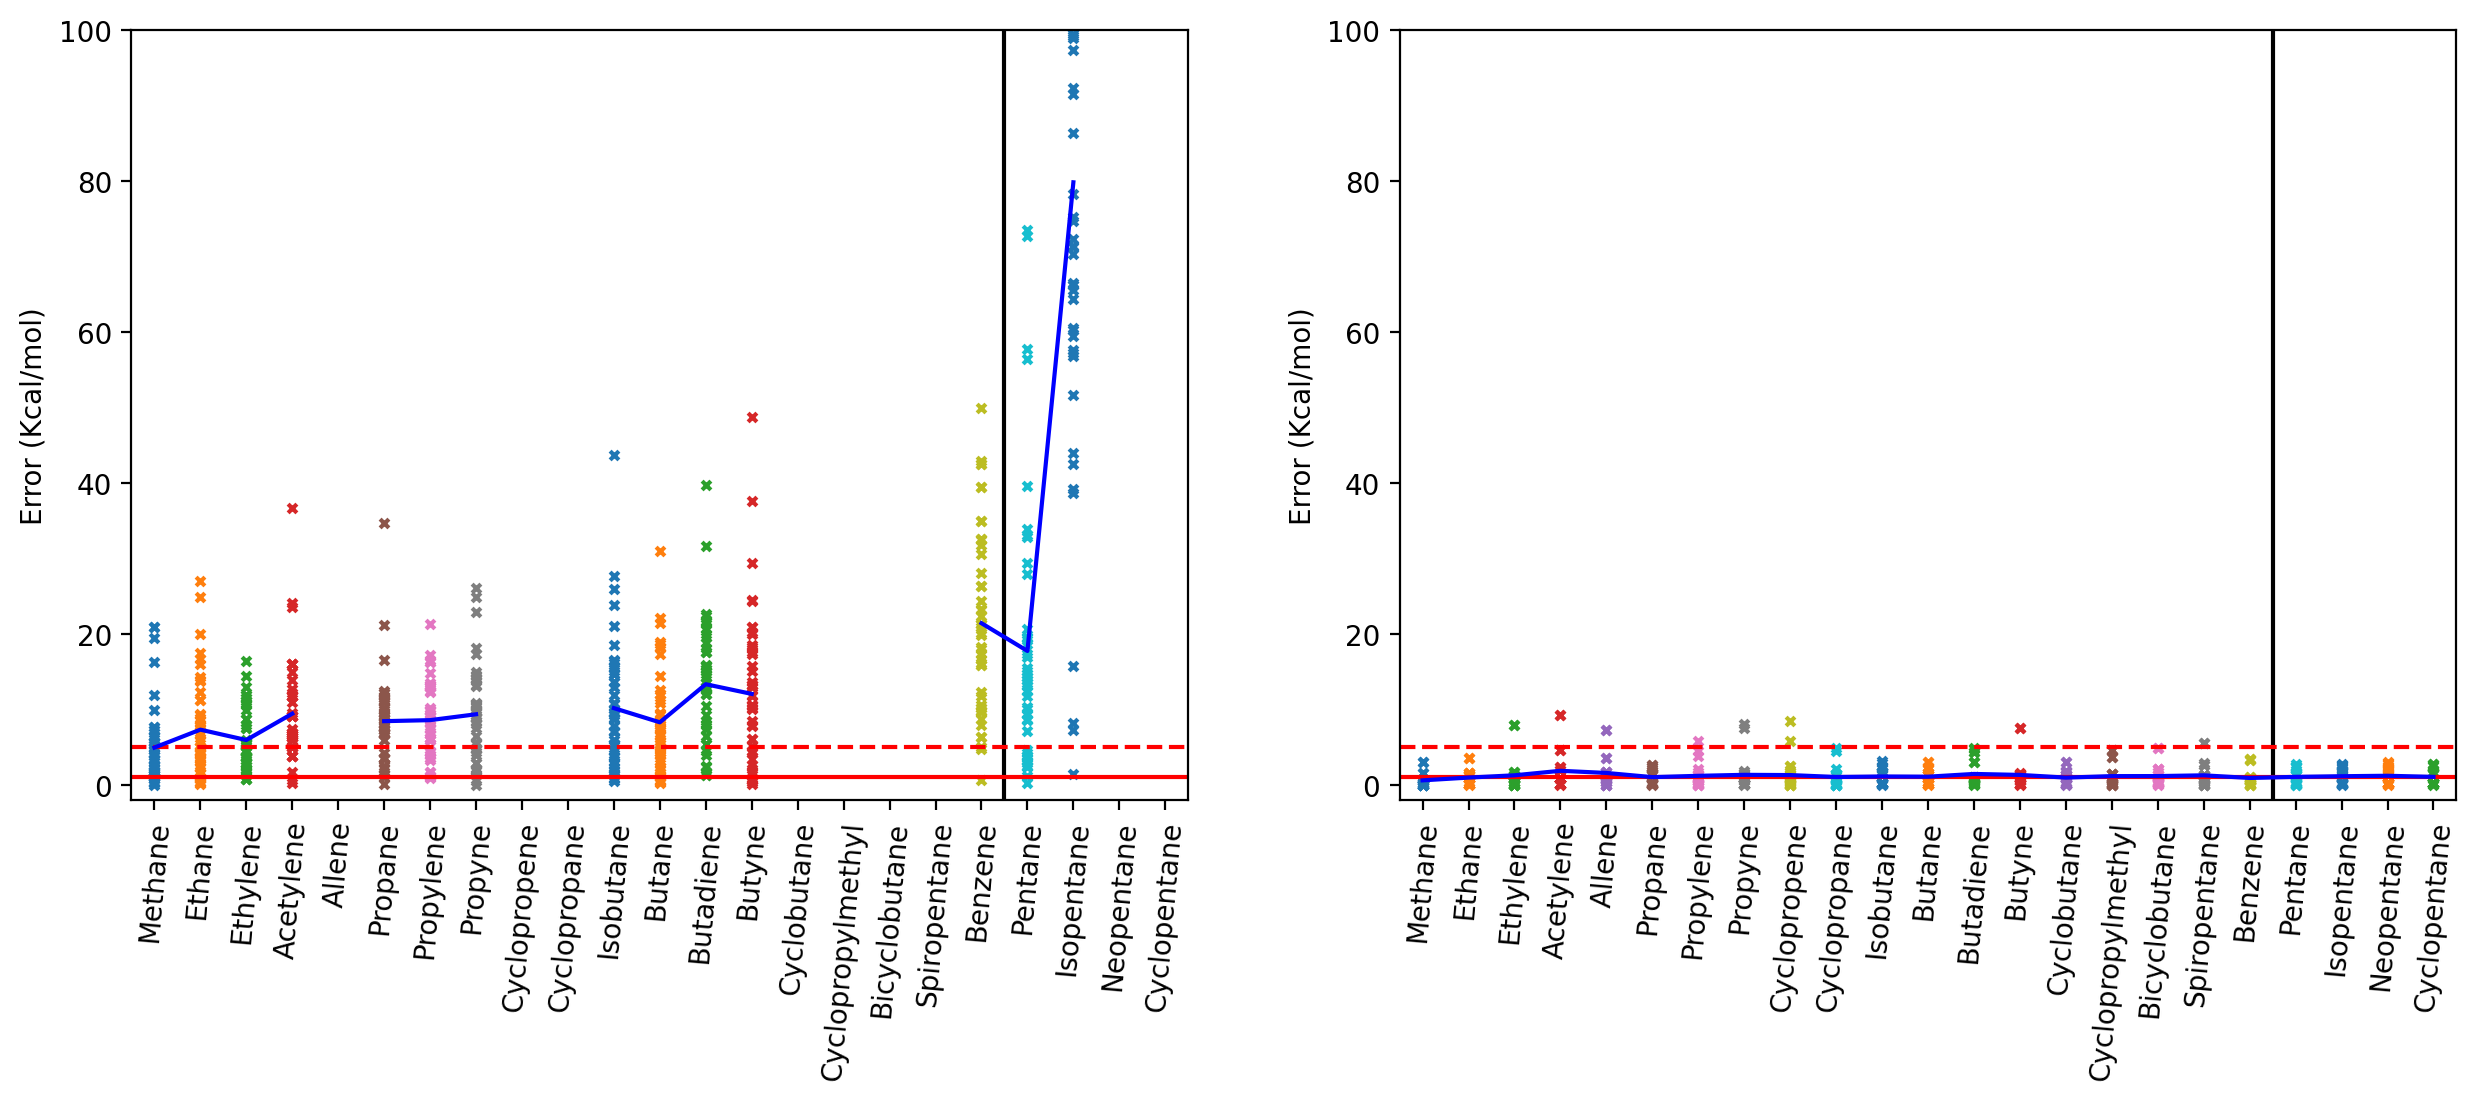

In [4]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Propane",
    "Propylene",
    "Propyne",
    "Cyclopropene",
    "Cyclopropane",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Cyclobutane",
    "Cyclopropylmethyl",
    "Bicyclobutane",
    "Spiropentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
    "Neopentane",
    "Cyclopentane",
    # "Hexane",
]

f, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.reshape(1, 2)

name_dir = "cc-5-1600"
load_path = Path("validate") / name_dir
# list_of_path = list(Path("validate/").glob("validate-*"))
# load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

for _ in range(1):
    error_l = []
    data = pd.read_csv(load_path / "train.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_np = np.abs(data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :]) * 0.627509
        data_np_sort = np.sort(data_np)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0,0].scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

    i += 1
    axes[0, 0].vlines(i - 0.5, -10, 100, "k")
    axes[0, 0].hlines(1, -0.5, 100 - 0.5, "r")
    axes[0, 0].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_np = np.abs(data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :]) * 0.627509
        data_np_sort = np.sort(data_np)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 0].scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

    axes[0, 0].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )

    axes[0, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")
    axes[0, 0].set_ylim(-2, 100)
    axes[0, 0].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[0, 0].set_ylabel("Error (Kcal/mol)")

    ## DFT
    list_of_path = list(Path("validate/").glob("dft"))
    load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

    error_l = []
    data = pd.read_csv(load_path / "train_dft.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            np.abs(data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :] - data_eq) * 0.627509
        )
        data_np_sort = np.sort(data_np)[1:]
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 1].scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

    i += 1
    axes[0, 1].vlines(i - 0.5, -10, 100, "k")
    axes[0, 1].hlines(1, -0.5, 100 - 0.5, "r")
    axes[0, 1].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval_dft.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            np.abs(data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :] - data_eq) * 0.627509
        )
        data_np_sort = np.sort(data_np)[1:]
        print(data_np_sort)
        error_l.append(np.mean(np.abs(data_np_sort)))
        axes[0, 1].scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

    axes[0, 1].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )
    print(error_l)
    axes[0, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")
    axes[0, 1].set_ylim(-2, 100)
    axes[0, 1].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[0, 1].set_ylabel("Error (Kcal/mol)")
plt.savefig(
    f"./manu/figures/energy-{name_dir}-{datetime.datetime.today():%Y-%m-%d-%H-%M-%S}.pdf",
    bbox_inches="tight",
)

In [3]:
import numpy as np
# print(np.linspace(-0.49, 0.49, 8))
print(np.linspace(-0.5, 0.5, 51))
print(np.linspace(-0.5, 0.0, 26))
print(np.linspace(0.02, 0.5, 25))

# -0.25*2 +0.08333333

[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2
  0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44
  0.46  0.48  0.5 ]
[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.  ]
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5 ]


In [11]:
(np.abs(np.linspace(-0.25, 0.25, 4) - 0) < 1e-4).any()

False